58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

Showing Feature Maps for VGG16


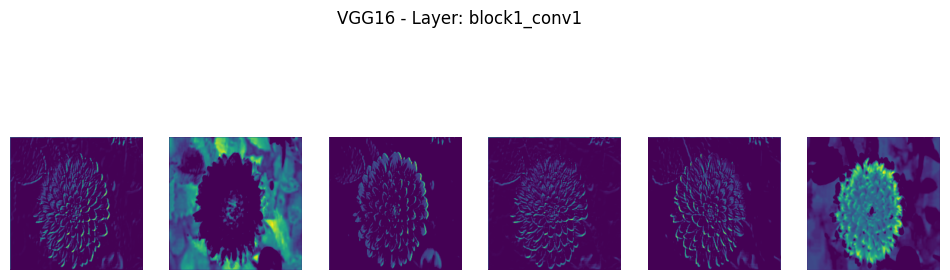

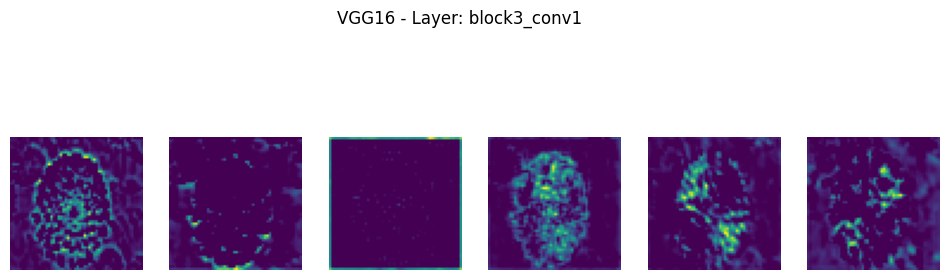

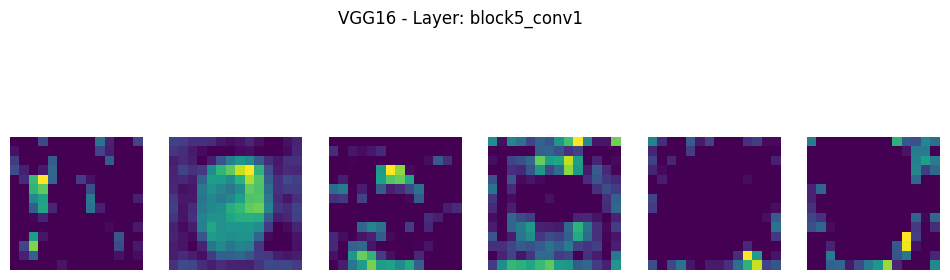

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step

Showing Feature Maps for ResNet50


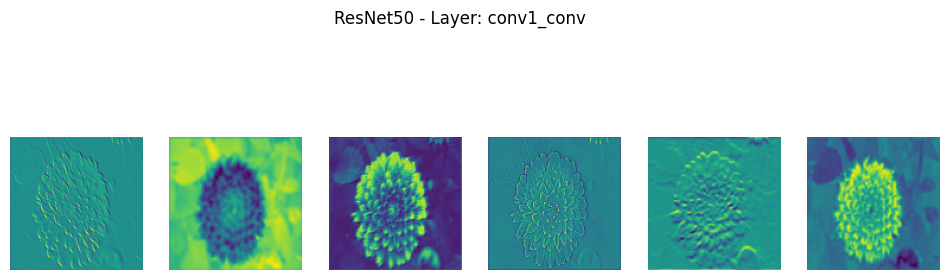

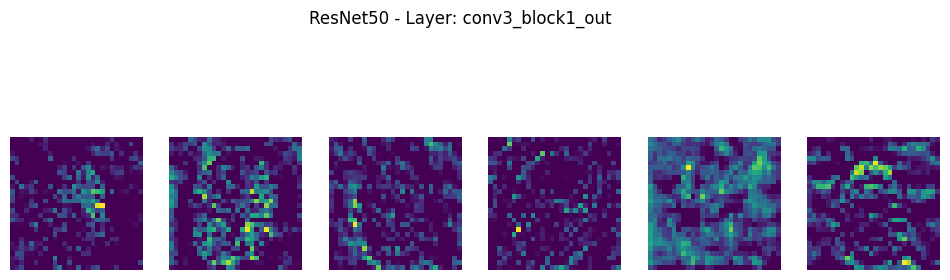

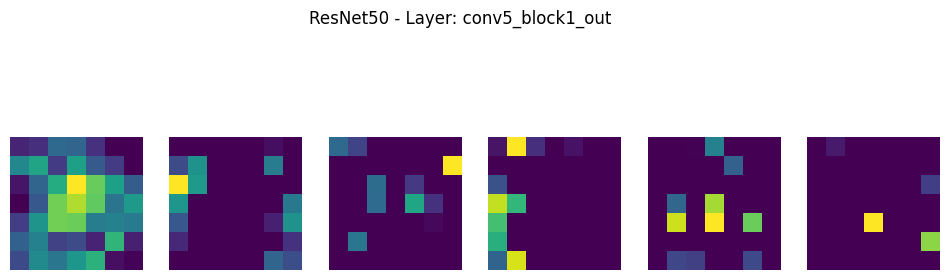

/tmp/ipython-input-2471559024.py:67: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobile_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step

Showing Feature Maps for MobileNetV2


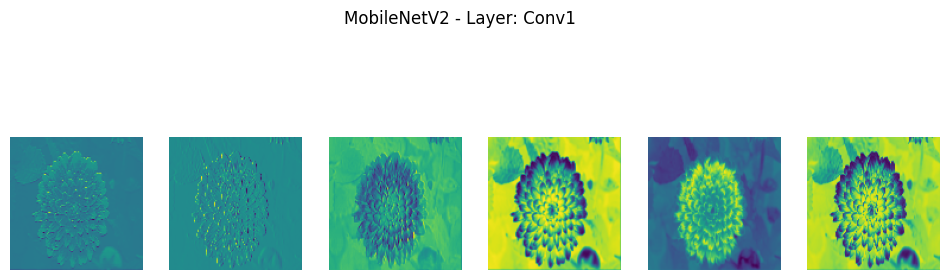

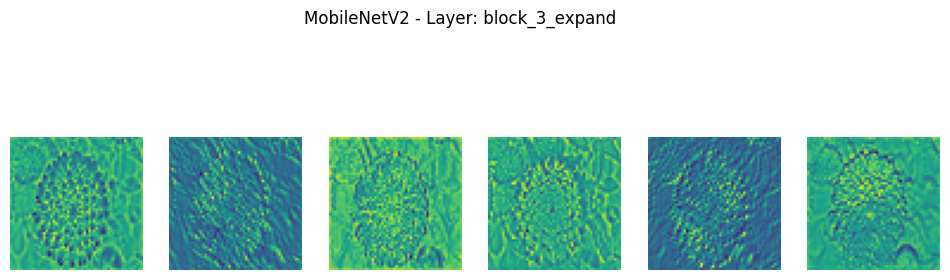

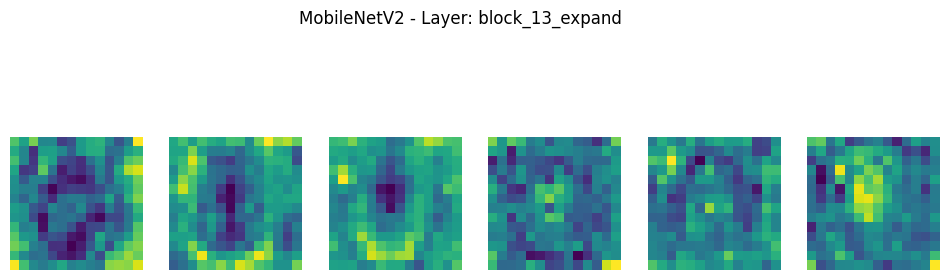

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import vgg16, resnet50, mobilenet_v2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# ---------------- LOAD IMAGE ----------------
IMG_PATH = "/content/sample_data/flower.png"

def load_img(img_path, size):
    img = image.load_img(img_path, target_size=size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# ---------------- VISUALIZE FEATURE MAPS ----------------
def visualize_feature_maps(base_model, preprocess_fn, img_size, layer_names, title):
    img_array = load_img(IMG_PATH, img_size)
    img_array = preprocess_fn(img_array)

    outputs = [base_model.get_layer(name).output for name in layer_names]
    model = Model(inputs=base_model.input, outputs=outputs)

    feature_maps = model.predict(img_array)

    print(f"\nShowing Feature Maps for {title}")

    for fmap, lname in zip(feature_maps, layer_names):
        plt.figure(figsize=(12,4))
        plt.suptitle(f"{title} - Layer: {lname}")


        for i in range(6):
            plt.subplot(1,6,i+1)
            plt.imshow(fmap[0, :, :, i], cmap='viridis')
            plt.axis('off')

        plt.show()


# ================= VGG16 =================
vgg_model = vgg16.VGG16(weights='imagenet', include_top=False)
vgg_layers = ['block1_conv1', 'block3_conv1', 'block5_conv1']

visualize_feature_maps(
    vgg_model,
    vgg16.preprocess_input,
    (224,224),
    vgg_layers,
    "VGG16"
)

# ================= ResNet50 =================
resnet_model = resnet50.ResNet50(weights='imagenet', include_top=False)
resnet_layers = ['conv1_conv', 'conv3_block1_out', 'conv5_block1_out']

visualize_feature_maps(
    resnet_model,
    resnet50.preprocess_input,
    (224,224),
    resnet_layers,
    "ResNet50"
)

# ================= MobileNetV2 =================
mobile_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False)
mobile_layers = ['Conv1', 'block_3_expand', 'block_13_expand']

visualize_feature_maps(
    mobile_model,
    mobilenet_v2.preprocess_input,
    (224,224),
    mobile_layers,
    "MobileNetV2"
)
